In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import numpy as np
from bokeh.plotting import figure
from bokeh.io import output_file, show

In [2]:
#Reading dataset
df = pd.read_csv('fev17.csv')

d:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Identifying all columns
df.columns =['id', 'Tipo do produto', 'Finalidade', 'Origem', 'Destino', 'Data serviço', 'Dia', 'Hora serviço', 'Localidade destino', 'UF destino', 'CSP', 'Grupo horário', 'Categoria', 'Serviço da fatura', 'Serviço configurado', 'Chamada', 'Particular', 'Código UE', 'Nome UE', 'Quantidade', 'Qtde tarifada', 'Unidade', 'Valor fatura', 'Dia vencimento', 'Indicador comparação ok', 'Valor retarifado', 'Matricula', 'Fatura', 'Funcionário', 'Prestadora', 'Evento tarifário', 'Item glosado', 'Percentual de ICMS', 'Valor líquido calculado', 'Nota fiscal', 'CNPJ cliente', 'Motivo produto não cadastrado', 'Tipo de serviço', 'Coletor', 'Rota de entrada', 'Rota de saída', 'Número do contrato', 'Localidade de origem', 'UF de origem', 'Mês', 'Ano']

In [4]:
#Checking the first two lines
df.head(2)

,id,Tipo do produto,Finalidade,Origem,Destino,Data serviço,Dia,Hora serviço,Localidade destino,UF destino,...,Motivo produto não cadastrado,Tipo de serviço,Coletor,Rota de entrada,Rota de saída,Número do contrato,Localidade de origem,UF de origem,Mês,Ano
0,490491,CELULAR,NaN,81999741361,81999940229,01/02/2017,QUA,16:23:25,PERNAMBUCO (81),PE,...,NaN,CELULAR,NaN,NaN,NaN,NaN,----VERIFICAR NO DICIONAR,NaN,2,2017
1,490539,CELULAR,NaN,81999940048,81999940041,16/01/2017,SEG,09:59:30,PERNAMBUCO (81),PE,...,NaN,CELULAR,NaN,NaN,NaN,NaN,----VERIFICAR NO DICIONAR,NaN,2,2017


In [5]:
#Replacing the decimal mark to '.' and thousand mark to empty
df['Valor fatura'] = df['Valor fatura'].str.replace('.','')
df['Valor fatura'] = df['Valor fatura'].str.replace(',','.')
df['Qtde tarifada'] = df['Qtde tarifada'].str.replace('.','')
df['Qtde tarifada'] = df['Qtde tarifada'].str.replace(',','.')

In [6]:
#Checking types
df.dtypes

id                                 int64
Tipo do produto                   object
Finalidade                       float64
Origem                             int64
Destino                           object
Data serviço                      object
Dia                               object
Hora serviço                      object
Localidade destino                object
UF destino                        object
CSP                                int64
Grupo horário                    float64
Categoria                         object
Serviço da fatura                 object
Serviço configurado               object
Chamada                           object
Particular                        object
Código UE                         object
Nome UE                           object
Quantidade                         int64
Qtde tarifada                     object
Unidade                           object
Valor fatura                      object
Dia vencimento                     int64
Indicador compar

In [7]:
#Changing type of some attributes so I can work on it
df.Origem = df.Origem.astype(object)
df['Valor fatura'] = df['Valor fatura'].astype(float)
df['Data serviço'] = pd.to_datetime(df['Data serviço'], format='%d/%m/%Y')
df['Hora serviço'] = pd.to_datetime(df['Hora serviço'], format='%H:%M:%S')
df['Qtde tarifada'] = df['Qtde tarifada'].astype(float)

In [8]:
#Checking types once again
df.dtypes

id                                        int64
Tipo do produto                          object
Finalidade                              float64
Origem                                   object
Destino                                  object
Data serviço                     datetime64[ns]
Dia                                      object
Hora serviço                     datetime64[ns]
Localidade destino                       object
UF destino                               object
CSP                                       int64
Grupo horário                           float64
Categoria                                object
Serviço da fatura                        object
Serviço configurado                      object
Chamada                                  object
Particular                               object
Código UE                                object
Nome UE                                  object
Quantidade                                int64
Qtde tarifada                           

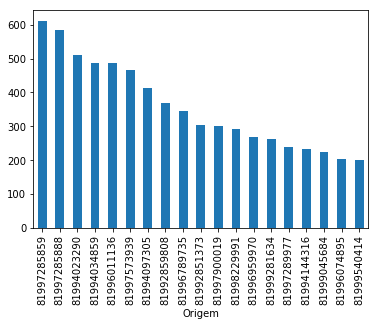

In [9]:
#Identifying Heavy Users
valoresOrigem = df.pivot_table(index='Origem', values='Valor fatura', aggfunc=np.sum).sort_values(ascending=False).head(20)
valoresOrigem.drop(valoresOrigem.index[0]).plot(kind='bar')


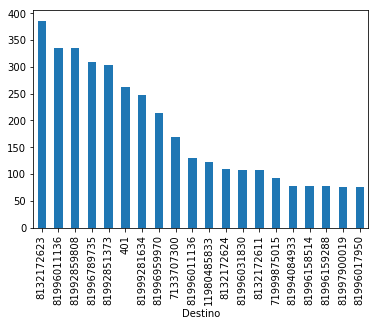

In [10]:
#Identifying Heavy Destinies
valoresDestino = df.pivot_table(index='Destino', values='Valor fatura', aggfunc=np.sum).sort_values(ascending=False).head(20)
valoresDestino.plot(kind='bar')

In [11]:
#Identifying cost per date
valoresData = df.pivot_table(index='Data serviço', values='Valor fatura', aggfunc=np.sum).sort_index(ascending=False)
valoresData

Data serviço
2017-02-08    27406.91
2017-02-07      464.63
2017-02-06      745.05
2017-02-05      499.02
2017-02-04      435.86
2017-02-03     1245.90
2017-02-02     1166.10
2017-02-01     1245.92
2017-01-31     1293.42
2017-01-30     1116.89
2017-01-29      419.04
2017-01-28      505.98
2017-01-27     1101.27
2017-01-26     1270.36
2017-01-25     1299.32
2017-01-24     1198.24
2017-01-23     1069.37
2017-01-22      232.10
2017-01-21      376.45
2017-01-20      942.30
2017-01-19     1693.41
2017-01-18     1144.53
2017-01-17       95.46
2017-01-16       46.90
2017-01-15       63.55
2017-01-14        9.49
2017-01-13       13.50
2017-01-12       56.00
2017-01-11      827.78
2017-01-10       32.34
2017-01-09       46.70
2017-01-08        7.24
2017-01-07        2.33
2017-01-06        1.77
2017-01-03        1.77
2016-12-12        0.00
2016-12-11        0.00
2016-12-08        0.00
2016-08-26      592.52
2016-07-18      302.00
Name: Valor fatura, dtype: float64

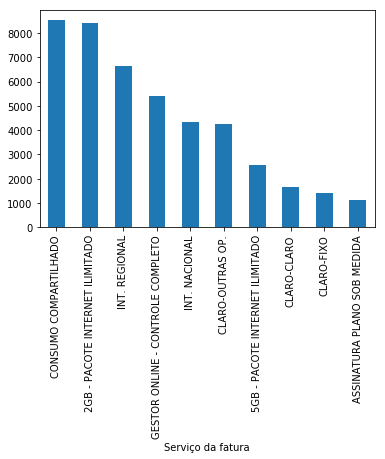

In [12]:
#Identifying Heavy Services
servicosCusto = df.pivot_table(index='Serviço da fatura', values='Valor fatura', aggfunc=np.sum).sort_values(ascending=False).head(10)
servicosCusto.plot(kind='bar')

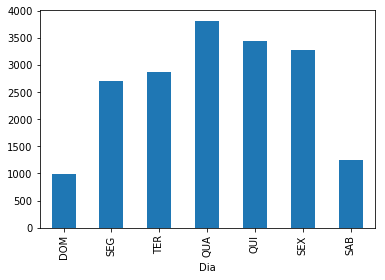

In [13]:
#Identifying weekly usage profile
servicosUso = df
servicosUso1 = servicosUso[(servicosUso.Categoria=='VC1') | (servicosUso.Categoria=='VC2') | (servicosUso.Categoria=='VC3') | (servicosUso.Categoria=='EVT')]
servicosUso2 = servicosUso1.pivot_table(index='Dia', values='Valor fatura', aggfunc=np.sum).sort_values(ascending=False)
servicosUso = servicosUso2.loc[['DOM','SEG','TER','QUA','QUI','SEX','SAB']]
servicosUso.plot(kind='bar')

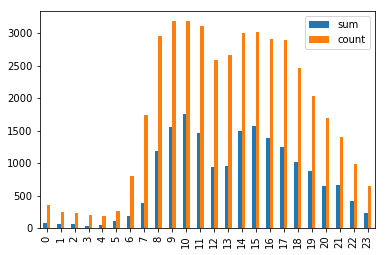

In [14]:
#Identifying time used
horarioUso = servicosUso1.pivot_table(index='Hora serviço', values='Valor fatura', aggfunc=np.sum).sort_values(ascending=False)
horarioUso.groupby(horarioUso.index.hour).agg(['sum','count']).plot(kind='bar')

#horarioUso.groupby(horarioUso.index.hour).sum()
#horarioUso.groupby(horarioUso.index.hour).count()

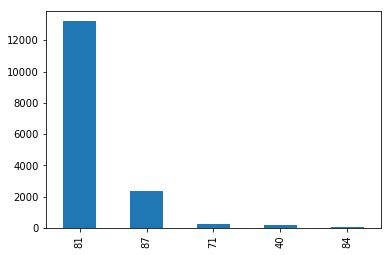

In [15]:
#Identifying most DDD called
ddd = df['Destino'].str[:2]
ddd.value_counts().head(5).plot(kind='bar')

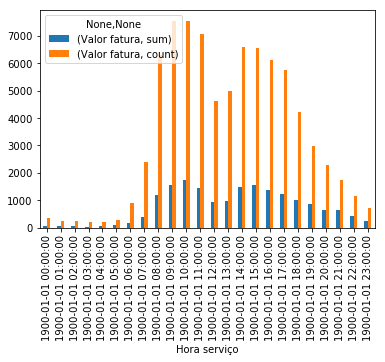

In [16]:
#Identifying hours
hora = servicosUso1[['Hora serviço', 'Valor fatura']]
hora = hora.set_index(['Hora serviço'])
hora = hora.groupby(pd.TimeGrouper(freq='60Min')).agg(['sum','count'])

hora.plot(kind='bar')

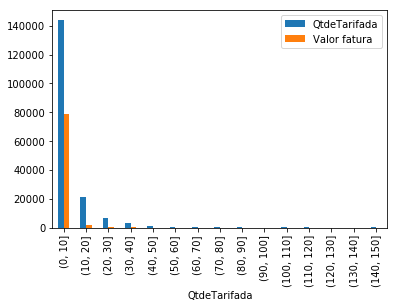

In [17]:
#Identifying hours
duracao = servicosUso1[['Qtde tarifada', 'Valor fatura']]
duracao = duracao.rename(columns={'Qtde tarifada': 'QtdeTarifada'})
#duracao = duracao.set_index('Qtde tarifada')
#ranges = [0,10,20,30,40,50,60,70,80,90,100]
ranges = np.arange(0,160,10)

duracao = duracao.groupby(pd.cut(duracao.QtdeTarifada, ranges)).agg({'QtdeTarifada':sum, 'Valor fatura':'count'}).fillna(0)
duracao.plot(kind='bar')

In [18]:
Gráficos
Serviços que geram maior custo [OK]
Horário mais utilizado por hora [OK]
Custo por data [OK]
Duração das chamadas [OK]
Perfil Semanal da conta [OK]
Origem com maior gasto [OK]
Destino com maior custo [OK]
DDD mais chamado [OK]

SyntaxError: invalid syntax (<ipython-input-18-0a77e079d42d>, line 2)